In [1]:
import pandas as pd

In [2]:
## Data Ingestions step
df = pd.read_csv('censusdata/adult.csv',names=['age','workclass','fnlwgt','education','education_num','marital-status','occupation','relationship','race','sex','capital_gain','capital_loss','hours-per-week','native-country','Target'])
df


,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours-per-week    0
native-country    0
Target            0
dtype: int64

In [10]:
## No missing values present in the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
## check for dupliacted records
df.duplicated().sum()

24

In [10]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(32537, 15)

In [14]:
numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']
print('numerical columns: ', numerical_columns)
print('categorical columns: ', categorical_columns)

numerical columns:  Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours-per-week'],
      dtype='object')
categorical columns:  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'Target'],
      dtype='object')


In [16]:
df[categorical_columns].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Target
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [17]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [18]:
df['workclass'].value_counts()

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [19]:
df['education'].value_counts()

education
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: int64

In [20]:
df['race'].value_counts()

race
 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

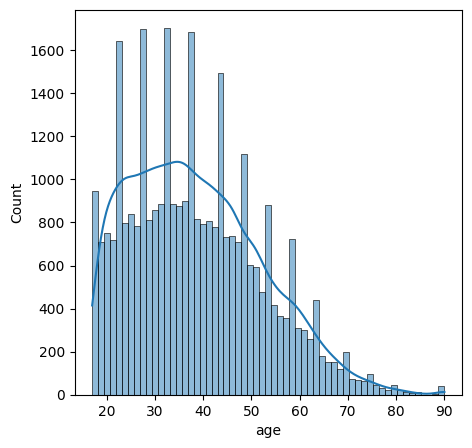

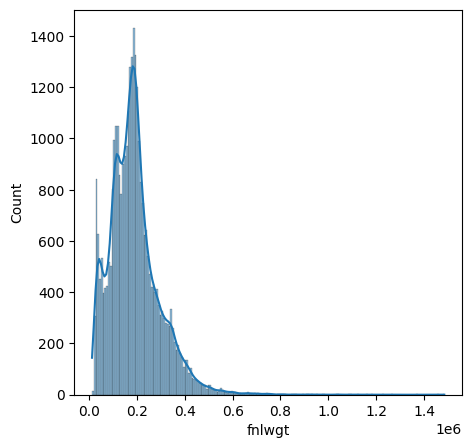

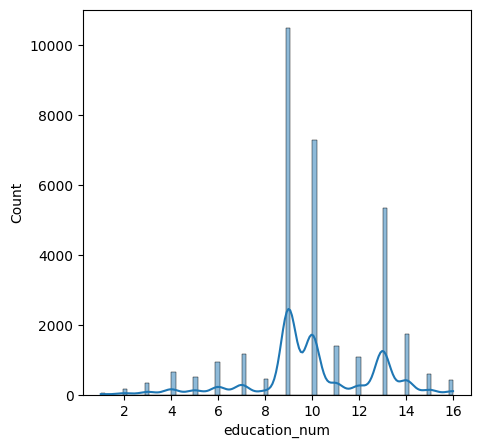

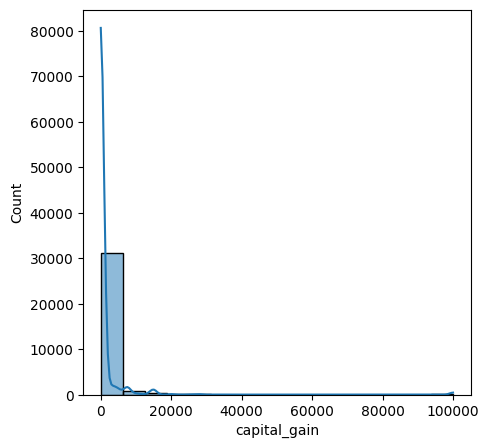

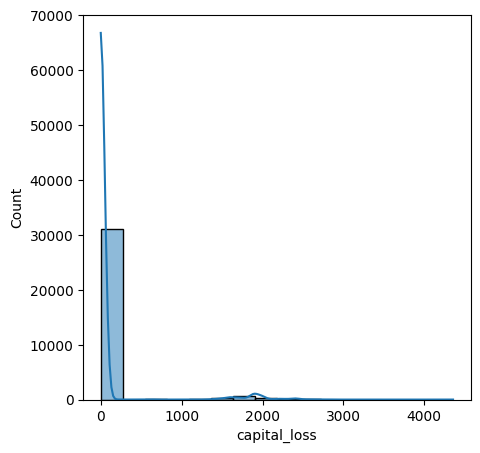

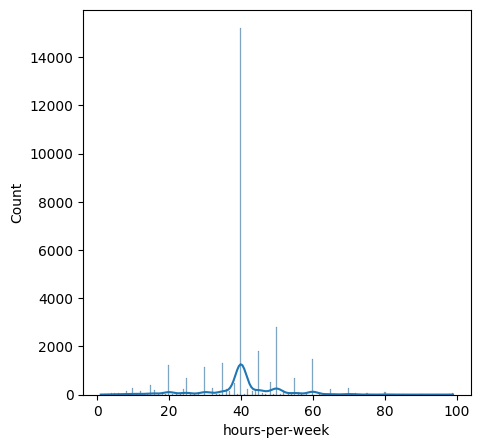

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
x=1
for i in numerical_columns:
    plt.figure(figsize=(5,5))
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

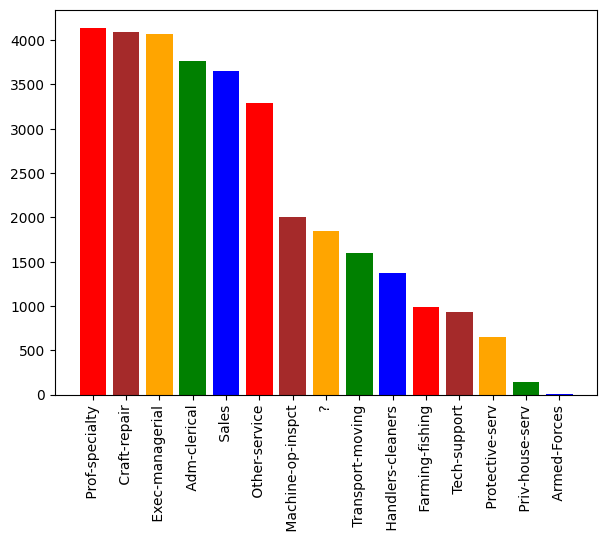

In [23]:
plt.figure(figsize=(7,5))
plt.bar(df['occupation'].value_counts().keys(),df['occupation'].value_counts(),color=['red','brown','orange','green','blue'])
plt.xticks(rotation=90)
plt.show()

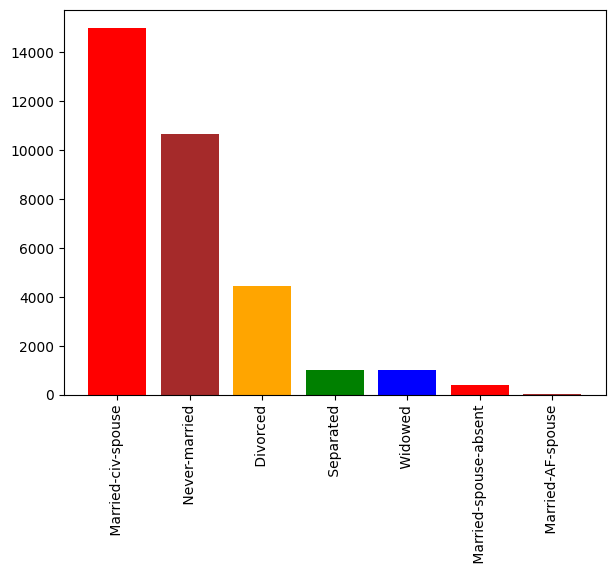

In [24]:
plt.figure(figsize=(7,5))
plt.bar(df['marital-status'].value_counts().keys(),df['marital-status'].value_counts(),color=['red','brown','orange','green','blue'])
plt.xticks(rotation=90)
plt.show()

<Axes: >

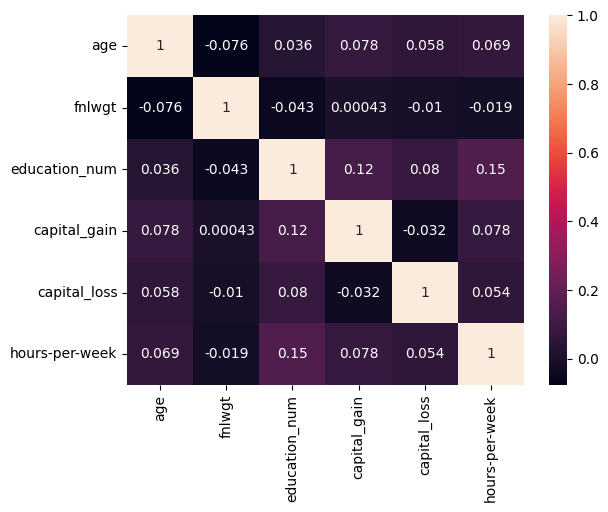

In [26]:
## correlation
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [27]:
df['education_num'].nunique()

16

In [28]:
df['education'].nunique()

16